## Import Libraries

In [221]:
import pandas as pd
import os
import glob
import seaborn as sns

# exploratory data analysis
import matplotlib.pyplot as plt

%matplotlib inline

## Exploratory Data Analysis

In [151]:
FILE_INPUT = './output/all_data_combined.csv'
df_all = pd.read_csv(FILE_INPUT)
df_all

,Usaha /Produk Utama,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Tahun Survey,Onclick,Sektor,Nama Badan Hukum,Jumlah Tenaga Kerja.1,Sistem Penjualan,Target Pasar Utama : Produk Masal,Target Pasar Utama : Produk Spesifik,Tingkat Pesaing Usaha,Total Aset,Penjualan Rata-Rata per Tahun,Proyeksi Pertumbuhan Penjualan,Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit,Unnamed: 0
0,Air Tebu,5,48,2,2011,?pm=RpTBuwFXpk0U+svpbtrrNw==&mp=Bjv3m4lcInn46O...,"Pertanian, Kehutanan, dan Perikanan",Perorangan,2.0,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Masyarakat Golongan Menengah (penghasilan Rp 5...,Sedang,"Rp. 5,00 Juta","Rp. 48,00 Juta",10 %/Tahun,"Rp. 5,00 Juta","Rp. 4,00 Juta",4,NaN
1,Amplang Blitar,"71,5",60,3,2014,?pm=rjoizvPnwBFrInEOmzGGCg==&mp=xI6rAeQkygTAn3...,"Pertanian, Kehutanan, dan Perikanan",Perorangan,3.0,Retail,Masyarakat Golongan Menengah (penghasilan Rp 5...,"Tidak Ada 0,00 %",Sedang,"Rp. 71,50 Juta","Rp. 60,00 Juta",10 %/Tahun,"Rp. 10,00 Juta","Rp. 200,00 Juta",3,NaN
2,Bandrek,0,0,1,2012,?pm=6qSIXAe2FXHSkx4JaHGCig==&mp=p1ca+Y2BZCwOZV...,"Pertanian, Kehutanan, dan Perikanan",Perorangan,1.0,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Tinggi,"Rp. 0,00 Juta","Rp. 0,00 Juta",0 %/Tahun,"Rp. 5,00 Juta","Rp. 6,00 Juta",7,NaN
3,Bengkoang,13,402,12,2012,?pm=PkfKI5UErkBEkyizF7P8RQ==&mp=p1ca+Y2BZCwOZV...,"Pertanian, Kehutanan, dan Perikanan",Perorangan,12.0,Distributor,Masyarakat Golongan Atas (penghasilan lebih da...,"Tidak Ada 0,00 %",Rendah,"Rp. 13,00 Juta","Rp. 402,00 Juta",2 %/Tahun,"Rp. 8,00 Juta","Rp. 10,00 Juta",5,NaN
4,Beras Dan Sayuran,89,600,3,2011,?pm=NlDG+tr8uWSJBncTyO62YA==&mp=Bjv3m4lcInn46O...,"Pertanian, Kehutanan, dan Perikanan",Perorangan,3.0,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Sedang,"Rp. 89,00 Juta","Rp. 600,00 Juta",10 %/Tahun,"Rp. 10,00 Juta","Rp. 24,00 Juta",4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,LOKET PEMBAYARAN LISTRIK,314.000.000,40.000.000,1,2013,?pm=aAn3y3aAVRAk2jA22WvOMA==&mp=fOhzApotY5QnAt...,Informasi dan Komunikasi,Perorangan,1.0,Retail,Masyarakat Golongan Menengah (penghasilan Rp 5...,Masyarakat Golongan Menengah (penghasilan Rp 5...,Rendah,"Rp. 314.000.000,00 Juta","Rp. 40.000.000,00 Juta",10 %/Tahun,"Rp. 10,00 Juta","Rp. 158,00 Juta",9,NaN
3908,Warnet,0,0,2,2012,?pm=Uzb+RUOOyBwAgpStvd68zw==&mp=p1ca+Y2BZCwOZV...,Informasi dan Komunikasi,Perorangan,2.0,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Sedang,"Rp. 0,00 Juta","Rp. 0,00 Juta",0 %/Tahun,"Rp. 10,00 Juta","Rp. 12,00 Juta",4,NaN
3909,Warnet,54,35,8,2014,?pm=i+QsDPAbnhOVkkq3ryh1nA==&mp=xI6rAeQkygTAn3...,Informasi dan Komunikasi,Perorangan,8.0,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,"Tidak Ada Â 0,00Â %",Tinggi,"Rp. 54,00 Juta","Rp. 35,00 Juta",- %/Tahun,"Rp. 1,00 Juta","Rp. 120,00 Juta",1,NaN
3910,Penjualan Pulsa,"4,6",30,1,2014,?pm=Ap/omNIg7Sjp88sSosQkXw==&mp=xI6rAeQkygTAn3...,Informasi dan Komunikasi,Perorangan,1.0,Retail,Masyarakat Golongan Menengah (penghasilan Rp 5...,"Tidak Ada Â 0,00Â %",Sedang,"Rp. 4,60 Juta","Rp. 30,00 Juta",- %/Tahun,"Rp. 10,00 Juta","Rp. 150,00 Juta",2,NaN


In [152]:
df_all.drop(['Onclick', 'Unnamed: 0'], axis=1, inplace=True)

In [153]:
# list of columns
df_all.columns

Index(['Usaha /Produk Utama', 'Total Aset (Rp. Juta)',
       'Penjualan Rata-rata Per Tahun (Rp.Juta)', 'Jumlah Tenaga Kerja',
       'Tahun Survey', 'Sektor', 'Nama Badan Hukum', 'Jumlah Tenaga Kerja.1',
       'Sistem Penjualan', 'Target Pasar Utama : Produk Masal',
       'Target Pasar Utama : Produk Spesifik', 'Tingkat Pesaing Usaha',
       'Total Aset', 'Penjualan Rata-Rata per Tahun',
       'Proyeksi Pertumbuhan Penjualan', 'Kebutuhan Pembiayaan Kredit ',
       'Nilai Aset yang data menjadi jaminan kredit',
       'Jumlah Dokumen Persyaratan Kredit'],
      dtype='object')

In [154]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3912 entries, 0 to 3911
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Usaha /Produk Utama                          3911 non-null   object 
 1   Total Aset (Rp. Juta)                        3912 non-null   object 
 2   Penjualan Rata-rata Per Tahun (Rp.Juta)      3912 non-null   object 
 3   Jumlah Tenaga Kerja                          3912 non-null   int64  
 4   Tahun Survey                                 3912 non-null   int64  
 5   Sektor                                       3912 non-null   object 
 6   Nama Badan Hukum                             3786 non-null   object 
 7   Jumlah Tenaga Kerja.1                        3786 non-null   float64
 8   Sistem Penjualan                             3786 non-null   object 
 9   Target Pasar Utama : Produk Masal            3912 non-null   object 
 10  

In [155]:
df_all.drop_duplicates(inplace=True)

In [156]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 3911
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Usaha /Produk Utama                          2996 non-null   object 
 1   Total Aset (Rp. Juta)                        2997 non-null   object 
 2   Penjualan Rata-rata Per Tahun (Rp.Juta)      2997 non-null   object 
 3   Jumlah Tenaga Kerja                          2997 non-null   int64  
 4   Tahun Survey                                 2997 non-null   int64  
 5   Sektor                                       2997 non-null   object 
 6   Nama Badan Hukum                             2891 non-null   object 
 7   Jumlah Tenaga Kerja.1                        2891 non-null   float64
 8   Sistem Penjualan                             2891 non-null   object 
 9   Target Pasar Utama : Produk Masal            2997 non-null   object 
 10  

### Converting String to Numeric

In [157]:
# fungsi bantuan untuk mengkonversi fitur menjadi data type integer
import numpy as np
def convert_to_int_helper(feature):
    try:
        return int(feature)
    except:
        return np.nan

In [158]:
df_all['Jumlah Dokumen Persyaratan Kredit'] = df_all['Jumlah Dokumen Persyaratan Kredit'].apply(convert_to_int_helper)

In [159]:
kolom_rup=['Kebutuhan Pembiayaan Kredit ','Nilai Aset yang data menjadi jaminan kredit']

for kolom in kolom_rup:
    df_all[kolom] = df_all[kolom].str.replace('Rp. ', '').str.replace(' ', '').str.replace('Juta', '')
    df_all[kolom] = df_all[kolom].str.replace(',00', '')

In [160]:
df_all['Kebutuhan Pembiayaan Kredit '] = df_all['Kebutuhan Pembiayaan Kredit '].apply(convert_to_int_helper)
df_all['Nilai Aset yang data menjadi jaminan kredit'] = df_all['Nilai Aset yang data menjadi jaminan kredit'].apply(convert_to_int_helper)

In [161]:
df_all.drop(columns=["Total Aset", "Penjualan Rata-Rata per Tahun", "Jumlah Tenaga Kerja.1"], inplace=True)

In [162]:
df_all

,Usaha /Produk Utama,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Tahun Survey,Sektor,Nama Badan Hukum,Sistem Penjualan,Target Pasar Utama : Produk Masal,Target Pasar Utama : Produk Spesifik,Tingkat Pesaing Usaha,Proyeksi Pertumbuhan Penjualan,Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit
0,Air Tebu,5,48,2,2011,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Masyarakat Golongan Menengah (penghasilan Rp 5...,Sedang,10 %/Tahun,5.0,4.0,4.0
1,Amplang Blitar,"71,5",60,3,2014,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Masyarakat Golongan Menengah (penghasilan Rp 5...,"Tidak Ada 0,00 %",Sedang,10 %/Tahun,10.0,200.0,3.0
2,Bandrek,0,0,1,2012,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Tinggi,0 %/Tahun,5.0,6.0,7.0
3,Bengkoang,13,402,12,2012,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Distributor,Masyarakat Golongan Atas (penghasilan lebih da...,"Tidak Ada 0,00 %",Rendah,2 %/Tahun,8.0,10.0,5.0
4,Beras Dan Sayuran,89,600,3,2011,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Sedang,10 %/Tahun,10.0,24.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,LOKET PEMBAYARAN LISTRIK,314.000.000,40.000.000,1,2013,Informasi dan Komunikasi,Perorangan,Retail,Masyarakat Golongan Menengah (penghasilan Rp 5...,Masyarakat Golongan Menengah (penghasilan Rp 5...,Rendah,10 %/Tahun,10.0,158.0,9.0
3908,Warnet,0,0,2,2012,Informasi dan Komunikasi,Perorangan,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Sedang,0 %/Tahun,10.0,12.0,4.0
3909,Warnet,54,35,8,2014,Informasi dan Komunikasi,Perorangan,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,"Tidak Ada Â 0,00Â %",Tinggi,- %/Tahun,1.0,120.0,1.0
3910,Penjualan Pulsa,"4,6",30,1,2014,Informasi dan Komunikasi,Perorangan,Retail,Masyarakat Golongan Menengah (penghasilan Rp 5...,"Tidak Ada Â 0,00Â %",Sedang,- %/Tahun,10.0,150.0,2.0


In [163]:
kolom_rup=['Proyeksi Pertumbuhan Penjualan']

for kolom in kolom_rup:
    df_all[kolom] = df_all[kolom].str.replace(' ', '').str.replace('%/Tahun', '')
    df_all[kolom] = df_all[kolom].apply(convert_to_int_helper)
    df_all[kolom] = df_all[kolom] / 100
    

In [164]:
df_all

,Usaha /Produk Utama,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Tahun Survey,Sektor,Nama Badan Hukum,Sistem Penjualan,Target Pasar Utama : Produk Masal,Target Pasar Utama : Produk Spesifik,Tingkat Pesaing Usaha,Proyeksi Pertumbuhan Penjualan,Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit
0,Air Tebu,5,48,2,2011,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Masyarakat Golongan Menengah (penghasilan Rp 5...,Sedang,0.10,5.0,4.0,4.0
1,Amplang Blitar,"71,5",60,3,2014,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Masyarakat Golongan Menengah (penghasilan Rp 5...,"Tidak Ada 0,00 %",Sedang,0.10,10.0,200.0,3.0
2,Bandrek,0,0,1,2012,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Tinggi,0.00,5.0,6.0,7.0
3,Bengkoang,13,402,12,2012,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Distributor,Masyarakat Golongan Atas (penghasilan lebih da...,"Tidak Ada 0,00 %",Rendah,0.02,8.0,10.0,5.0
4,Beras Dan Sayuran,89,600,3,2011,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Sedang,0.10,10.0,24.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,LOKET PEMBAYARAN LISTRIK,314.000.000,40.000.000,1,2013,Informasi dan Komunikasi,Perorangan,Retail,Masyarakat Golongan Menengah (penghasilan Rp 5...,Masyarakat Golongan Menengah (penghasilan Rp 5...,Rendah,0.10,10.0,158.0,9.0
3908,Warnet,0,0,2,2012,Informasi dan Komunikasi,Perorangan,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,Sedang,0.00,10.0,12.0,4.0
3909,Warnet,54,35,8,2014,Informasi dan Komunikasi,Perorangan,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,"Tidak Ada Â 0,00Â %",Tinggi,NaN,1.0,120.0,1.0
3910,Penjualan Pulsa,"4,6",30,1,2014,Informasi dan Komunikasi,Perorangan,Retail,Masyarakat Golongan Menengah (penghasilan Rp 5...,"Tidak Ada Â 0,00Â %",Sedang,NaN,10.0,150.0,2.0


In [165]:
def separator(x):
    if 'gol bawah' in x.lower():
        return 'golongan bawah'
    elif 'golongan atas' in x.lower():
        return 'golongan atas'
    elif 'golongan menengah' in x.lower():
        return 'golongan menengah'
    elif 'memenuhi order' in x.lower():
        return 'memenuhi order distributor/exportir/trader'
    elif 'tidak ada'in x.lower():
        return 'tidak ada'
    else:
        return np.NaN

In [166]:
df_all['Sasaran Produk Massal'] = df_all['Target Pasar Utama : Produk Masal'].apply(separator)
df_all['Persentase Massal'] = df_all['Target Pasar Utama : Produk Masal'].apply(lambda x: str(x.split('\xa0')[-2])[:-3])
df_all['Sasaran Produk Spesifik'] = df_all['Target Pasar Utama : Produk Spesifik'].apply(separator)
df_all['Persentase Spesifik'] = df_all['Target Pasar Utama : Produk Spesifik'].apply(lambda x: str(x.split('\xa0')[-2])[:-3])

df_all.drop('Target Pasar Utama : Produk Masal', axis=1, inplace=True)
df_all.drop('Target Pasar Utama : Produk Spesifik', axis=1, inplace=True)

In [167]:
df_all

,Usaha /Produk Utama,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Tahun Survey,Sektor,Nama Badan Hukum,Sistem Penjualan,Tingkat Pesaing Usaha,Proyeksi Pertumbuhan Penjualan,Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit,Sasaran Produk Massal,Persentase Massal,Sasaran Produk Spesifik,Persentase Spesifik
0,Air Tebu,5,48,2,2011,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,5.0,4.0,4.0,golongan bawah,100,golongan menengah,0
1,Amplang Blitar,"71,5",60,3,2014,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,10.0,200.0,3.0,golongan menengah,100,tidak ada,0
2,Bandrek,0,0,1,2012,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Tinggi,0.00,5.0,6.0,7.0,golongan bawah,0,golongan bawah,0
3,Bengkoang,13,402,12,2012,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Distributor,Rendah,0.02,8.0,10.0,5.0,golongan atas,100,tidak ada,0
4,Beras Dan Sayuran,89,600,3,2011,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,10.0,24.0,4.0,golongan bawah,100,golongan bawah,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,LOKET PEMBAYARAN LISTRIK,314.000.000,40.000.000,1,2013,Informasi dan Komunikasi,Perorangan,Retail,Rendah,0.10,10.0,158.0,9.0,golongan menengah,"100,",golongan menengah,"100,"
3908,Warnet,0,0,2,2012,Informasi dan Komunikasi,Perorangan,Retail,Sedang,0.00,10.0,12.0,4.0,golongan bawah,"50,",golongan bawah,"50,"
3909,Warnet,54,35,8,2014,Informasi dan Komunikasi,Perorangan,Retail,Tinggi,NaN,1.0,120.0,1.0,golongan bawah,"100,",tidak ada,"0,"
3910,Penjualan Pulsa,"4,6",30,1,2014,Informasi dan Komunikasi,Perorangan,Retail,Sedang,NaN,10.0,150.0,2.0,golongan menengah,"100,",tidak ada,"0,"


In [168]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 3911
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Usaha /Produk Utama                          2996 non-null   object 
 1   Total Aset (Rp. Juta)                        2997 non-null   object 
 2   Penjualan Rata-rata Per Tahun (Rp.Juta)      2997 non-null   object 
 3   Jumlah Tenaga Kerja                          2997 non-null   int64  
 4   Tahun Survey                                 2997 non-null   int64  
 5   Sektor                                       2997 non-null   object 
 6   Nama Badan Hukum                             2891 non-null   object 
 7   Sistem Penjualan                             2891 non-null   object 
 8   Tingkat Pesaing Usaha                        2891 non-null   object 
 9   Proyeksi Pertumbuhan Penjualan               2446 non-null   float64
 10  

In [169]:
import re
def remove_comma(data):
    if ',' in data:
        new_string = re.sub(r'[^\w\s]', '', data)
        return new_string
    else: return data
    
df_all['Persentase Massal'] = df_all['Persentase Massal'].apply(remove_comma)

In [170]:
df_all['Persentase Massal'] = df_all['Persentase Massal'].apply(convert_to_int_helper)

In [171]:
df_all

,Usaha /Produk Utama,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Tahun Survey,Sektor,Nama Badan Hukum,Sistem Penjualan,Tingkat Pesaing Usaha,Proyeksi Pertumbuhan Penjualan,Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit,Sasaran Produk Massal,Persentase Massal,Sasaran Produk Spesifik,Persentase Spesifik
0,Air Tebu,5,48,2,2011,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,5.0,4.0,4.0,golongan bawah,100.0,golongan menengah,0
1,Amplang Blitar,"71,5",60,3,2014,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,10.0,200.0,3.0,golongan menengah,100.0,tidak ada,0
2,Bandrek,0,0,1,2012,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Tinggi,0.00,5.0,6.0,7.0,golongan bawah,0.0,golongan bawah,0
3,Bengkoang,13,402,12,2012,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Distributor,Rendah,0.02,8.0,10.0,5.0,golongan atas,100.0,tidak ada,0
4,Beras Dan Sayuran,89,600,3,2011,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,10.0,24.0,4.0,golongan bawah,100.0,golongan bawah,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,LOKET PEMBAYARAN LISTRIK,314.000.000,40.000.000,1,2013,Informasi dan Komunikasi,Perorangan,Retail,Rendah,0.10,10.0,158.0,9.0,golongan menengah,100.0,golongan menengah,"100,"
3908,Warnet,0,0,2,2012,Informasi dan Komunikasi,Perorangan,Retail,Sedang,0.00,10.0,12.0,4.0,golongan bawah,50.0,golongan bawah,"50,"
3909,Warnet,54,35,8,2014,Informasi dan Komunikasi,Perorangan,Retail,Tinggi,NaN,1.0,120.0,1.0,golongan bawah,100.0,tidak ada,"0,"
3910,Penjualan Pulsa,"4,6",30,1,2014,Informasi dan Komunikasi,Perorangan,Retail,Sedang,NaN,10.0,150.0,2.0,golongan menengah,100.0,tidak ada,"0,"


In [172]:
df_all['Persentase Massal'].unique()

array([1.0e+02, 0.0e+00, 5.0e+01, 7.0e+01, 3.0e+01, 2.0e+01, 4.0e+01,
       8.0e+01, 9.0e+01, 6.0e+01, 2.5e+01, 1.0e+01, 7.5e+01, 3.7e+01,
       5.0e+00, 8.5e+01, 2.0e+00, 9.5e+01, 1.0e+04, 6.0e+03, 5.0e+03,
       1.0e+03, 8.0e+03, 3.0e+03, 7.0e+03, 1.5e+03, 5.0e+02, 2.0e+03,
       4.0e+03, 9.0e+03, 6.5e+03, 2.5e+03, 7.5e+03, 8.5e+03, 9.5e+03,
       4.5e+03,     nan])

In [173]:
df_all['Persentase Spesifik'] = df_all['Persentase Spesifik'].apply(remove_comma)
df_all['Persentase Spesifik'] = df_all['Persentase Spesifik'].apply(convert_to_int_helper)

In [174]:
df_all

,Usaha /Produk Utama,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Tahun Survey,Sektor,Nama Badan Hukum,Sistem Penjualan,Tingkat Pesaing Usaha,Proyeksi Pertumbuhan Penjualan,Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit,Sasaran Produk Massal,Persentase Massal,Sasaran Produk Spesifik,Persentase Spesifik
0,Air Tebu,5,48,2,2011,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,5.0,4.0,4.0,golongan bawah,100.0,golongan menengah,0.0
1,Amplang Blitar,"71,5",60,3,2014,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,10.0,200.0,3.0,golongan menengah,100.0,tidak ada,0.0
2,Bandrek,0,0,1,2012,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Tinggi,0.00,5.0,6.0,7.0,golongan bawah,0.0,golongan bawah,0.0
3,Bengkoang,13,402,12,2012,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Distributor,Rendah,0.02,8.0,10.0,5.0,golongan atas,100.0,tidak ada,0.0
4,Beras Dan Sayuran,89,600,3,2011,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,10.0,24.0,4.0,golongan bawah,100.0,golongan bawah,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,LOKET PEMBAYARAN LISTRIK,314.000.000,40.000.000,1,2013,Informasi dan Komunikasi,Perorangan,Retail,Rendah,0.10,10.0,158.0,9.0,golongan menengah,100.0,golongan menengah,100.0
3908,Warnet,0,0,2,2012,Informasi dan Komunikasi,Perorangan,Retail,Sedang,0.00,10.0,12.0,4.0,golongan bawah,50.0,golongan bawah,50.0
3909,Warnet,54,35,8,2014,Informasi dan Komunikasi,Perorangan,Retail,Tinggi,NaN,1.0,120.0,1.0,golongan bawah,100.0,tidak ada,0.0
3910,Penjualan Pulsa,"4,6",30,1,2014,Informasi dan Komunikasi,Perorangan,Retail,Sedang,NaN,10.0,150.0,2.0,golongan menengah,100.0,tidak ada,0.0


In [175]:
def sasaran_produk(row):
    if(float(row['Persentase Massal'])>=50):
        val=row['Sasaran Produk Massal']
    else:
        val=row['Sasaran Produk Spesifik']
    return val

In [176]:
df_all['Sasaran Produk']=df_all.apply(sasaran_produk,axis=1)

In [177]:
df_all.drop('Sasaran Produk Massal', axis=1, inplace=True)
df_all.drop('Persentase Massal', axis=1, inplace=True)
df_all.drop('Sasaran Produk Spesifik', axis=1, inplace=True)
df_all.drop('Persentase Spesifik', axis=1, inplace=True)

In [178]:
df_all

,Usaha /Produk Utama,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Tahun Survey,Sektor,Nama Badan Hukum,Sistem Penjualan,Tingkat Pesaing Usaha,Proyeksi Pertumbuhan Penjualan,Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit,Sasaran Produk
0,Air Tebu,5,48,2,2011,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,5.0,4.0,4.0,golongan bawah
1,Amplang Blitar,"71,5",60,3,2014,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,10.0,200.0,3.0,golongan menengah
2,Bandrek,0,0,1,2012,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Tinggi,0.00,5.0,6.0,7.0,golongan bawah
3,Bengkoang,13,402,12,2012,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Distributor,Rendah,0.02,8.0,10.0,5.0,golongan atas
4,Beras Dan Sayuran,89,600,3,2011,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,10.0,24.0,4.0,golongan bawah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,LOKET PEMBAYARAN LISTRIK,314.000.000,40.000.000,1,2013,Informasi dan Komunikasi,Perorangan,Retail,Rendah,0.10,10.0,158.0,9.0,golongan menengah
3908,Warnet,0,0,2,2012,Informasi dan Komunikasi,Perorangan,Retail,Sedang,0.00,10.0,12.0,4.0,golongan bawah
3909,Warnet,54,35,8,2014,Informasi dan Komunikasi,Perorangan,Retail,Tinggi,NaN,1.0,120.0,1.0,golongan bawah
3910,Penjualan Pulsa,"4,6",30,1,2014,Informasi dan Komunikasi,Perorangan,Retail,Sedang,NaN,10.0,150.0,2.0,golongan menengah


In [179]:
#delete tipo
df_all['Tahun Survey']=df_all['Tahun Survey'].replace(3012,2012)
df_all['Tahun Survey']=df_all['Tahun Survey'].replace(2913,2013)

#ganti - jadi null
df_all['Nama Badan Hukum']=df_all['Nama Badan Hukum'].replace('-',np.NaN)

df_all['Sistem Penjualan']=df_all['Sistem Penjualan'].replace('-',np.NaN)

df_all['Tingkat Pesaing Usaha']=df_all['Tingkat Pesaing Usaha'].replace('-',np.NaN)

In [180]:
df_all

,Usaha /Produk Utama,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Tahun Survey,Sektor,Nama Badan Hukum,Sistem Penjualan,Tingkat Pesaing Usaha,Proyeksi Pertumbuhan Penjualan,Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit,Sasaran Produk
0,Air Tebu,5,48,2,2011,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,5.0,4.0,4.0,golongan bawah
1,Amplang Blitar,"71,5",60,3,2014,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,10.0,200.0,3.0,golongan menengah
2,Bandrek,0,0,1,2012,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Tinggi,0.00,5.0,6.0,7.0,golongan bawah
3,Bengkoang,13,402,12,2012,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Distributor,Rendah,0.02,8.0,10.0,5.0,golongan atas
4,Beras Dan Sayuran,89,600,3,2011,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,10.0,24.0,4.0,golongan bawah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,LOKET PEMBAYARAN LISTRIK,314.000.000,40.000.000,1,2013,Informasi dan Komunikasi,Perorangan,Retail,Rendah,0.10,10.0,158.0,9.0,golongan menengah
3908,Warnet,0,0,2,2012,Informasi dan Komunikasi,Perorangan,Retail,Sedang,0.00,10.0,12.0,4.0,golongan bawah
3909,Warnet,54,35,8,2014,Informasi dan Komunikasi,Perorangan,Retail,Tinggi,NaN,1.0,120.0,1.0,golongan bawah
3910,Penjualan Pulsa,"4,6",30,1,2014,Informasi dan Komunikasi,Perorangan,Retail,Sedang,NaN,10.0,150.0,2.0,golongan menengah


In [181]:
df_all['Total Aset (Rp. Juta)']=df_all['Total Aset (Rp. Juta)'].str.replace(',','.')
df_all['Penjualan Rata-rata Per Tahun (Rp.Juta)']=df_all['Penjualan Rata-rata Per Tahun (Rp.Juta)'].str.replace(',','.')

In [182]:
def ganti_ganti(data):
    if len(data) > 6:
        data = float(data.replace(',','.').replace('.',''))
        data = data / 1000000
        
    return data

In [183]:
df_all['Total Aset (Rp. Juta)'] = df_all['Total Aset (Rp. Juta)'].apply(ganti_ganti)
df_all['Penjualan Rata-rata Per Tahun (Rp.Juta)'] = df_all['Penjualan Rata-rata Per Tahun (Rp.Juta)'].apply(ganti_ganti)

In [184]:
df_all

,Usaha /Produk Utama,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Tahun Survey,Sektor,Nama Badan Hukum,Sistem Penjualan,Tingkat Pesaing Usaha,Proyeksi Pertumbuhan Penjualan,Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit,Sasaran Produk
0,Air Tebu,5,48,2,2011,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,5.0,4.0,4.0,golongan bawah
1,Amplang Blitar,71.5,60,3,2014,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,10.0,200.0,3.0,golongan menengah
2,Bandrek,0,0,1,2012,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Tinggi,0.00,5.0,6.0,7.0,golongan bawah
3,Bengkoang,13,402,12,2012,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Distributor,Rendah,0.02,8.0,10.0,5.0,golongan atas
4,Beras Dan Sayuran,89,600,3,2011,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,10.0,24.0,4.0,golongan bawah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,LOKET PEMBAYARAN LISTRIK,314,40,1,2013,Informasi dan Komunikasi,Perorangan,Retail,Rendah,0.10,10.0,158.0,9.0,golongan menengah
3908,Warnet,0,0,2,2012,Informasi dan Komunikasi,Perorangan,Retail,Sedang,0.00,10.0,12.0,4.0,golongan bawah
3909,Warnet,54,35,8,2014,Informasi dan Komunikasi,Perorangan,Retail,Tinggi,NaN,1.0,120.0,1.0,golongan bawah
3910,Penjualan Pulsa,4.6,30,1,2014,Informasi dan Komunikasi,Perorangan,Retail,Sedang,NaN,10.0,150.0,2.0,golongan menengah


In [185]:
df_all

,Usaha /Produk Utama,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Tahun Survey,Sektor,Nama Badan Hukum,Sistem Penjualan,Tingkat Pesaing Usaha,Proyeksi Pertumbuhan Penjualan,Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit,Sasaran Produk
0,Air Tebu,5,48,2,2011,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,5.0,4.0,4.0,golongan bawah
1,Amplang Blitar,71.5,60,3,2014,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,10.0,200.0,3.0,golongan menengah
2,Bandrek,0,0,1,2012,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Tinggi,0.00,5.0,6.0,7.0,golongan bawah
3,Bengkoang,13,402,12,2012,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Distributor,Rendah,0.02,8.0,10.0,5.0,golongan atas
4,Beras Dan Sayuran,89,600,3,2011,"Pertanian, Kehutanan, dan Perikanan",Perorangan,Retail,Sedang,0.10,10.0,24.0,4.0,golongan bawah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,LOKET PEMBAYARAN LISTRIK,314,40,1,2013,Informasi dan Komunikasi,Perorangan,Retail,Rendah,0.10,10.0,158.0,9.0,golongan menengah
3908,Warnet,0,0,2,2012,Informasi dan Komunikasi,Perorangan,Retail,Sedang,0.00,10.0,12.0,4.0,golongan bawah
3909,Warnet,54,35,8,2014,Informasi dan Komunikasi,Perorangan,Retail,Tinggi,NaN,1.0,120.0,1.0,golongan bawah
3910,Penjualan Pulsa,4.6,30,1,2014,Informasi dan Komunikasi,Perorangan,Retail,Sedang,NaN,10.0,150.0,2.0,golongan menengah


In [186]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 3911
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Usaha /Produk Utama                          2996 non-null   object 
 1   Total Aset (Rp. Juta)                        2997 non-null   object 
 2   Penjualan Rata-rata Per Tahun (Rp.Juta)      2997 non-null   object 
 3   Jumlah Tenaga Kerja                          2997 non-null   int64  
 4   Tahun Survey                                 2997 non-null   int64  
 5   Sektor                                       2997 non-null   object 
 6   Nama Badan Hukum                             2890 non-null   object 
 7   Sistem Penjualan                             2879 non-null   object 
 8   Tingkat Pesaing Usaha                        2883 non-null   object 
 9   Proyeksi Pertumbuhan Penjualan               2446 non-null   float64
 10  

In [187]:
#ubah tipe data
df_all = df_all.astype({'Total Aset (Rp. Juta)':'float','Penjualan Rata-rata Per Tahun (Rp.Juta)':'float'})

In [188]:
df_all = df_all[df_all['Nama Badan Hukum'].isin(['Perorangan', 'Usaha Dagang (UD)', np.NaN])]
df_all.drop('Nama Badan Hukum', axis=1, inplace=True)

In [189]:
df_all

,Usaha /Produk Utama,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Tahun Survey,Sektor,Sistem Penjualan,Tingkat Pesaing Usaha,Proyeksi Pertumbuhan Penjualan,Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit,Sasaran Produk
0,Air Tebu,5.0,48.0,2,2011,"Pertanian, Kehutanan, dan Perikanan",Retail,Sedang,0.10,5.0,4.0,4.0,golongan bawah
1,Amplang Blitar,71.5,60.0,3,2014,"Pertanian, Kehutanan, dan Perikanan",Retail,Sedang,0.10,10.0,200.0,3.0,golongan menengah
2,Bandrek,0.0,0.0,1,2012,"Pertanian, Kehutanan, dan Perikanan",Retail,Tinggi,0.00,5.0,6.0,7.0,golongan bawah
3,Bengkoang,13.0,402.0,12,2012,"Pertanian, Kehutanan, dan Perikanan",Distributor,Rendah,0.02,8.0,10.0,5.0,golongan atas
4,Beras Dan Sayuran,89.0,600.0,3,2011,"Pertanian, Kehutanan, dan Perikanan",Retail,Sedang,0.10,10.0,24.0,4.0,golongan bawah
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,LOKET PEMBAYARAN LISTRIK,314.0,40.0,1,2013,Informasi dan Komunikasi,Retail,Rendah,0.10,10.0,158.0,9.0,golongan menengah
3908,Warnet,0.0,0.0,2,2012,Informasi dan Komunikasi,Retail,Sedang,0.00,10.0,12.0,4.0,golongan bawah
3909,Warnet,54.0,35.0,8,2014,Informasi dan Komunikasi,Retail,Tinggi,NaN,1.0,120.0,1.0,golongan bawah
3910,Penjualan Pulsa,4.6,30.0,1,2014,Informasi dan Komunikasi,Retail,Sedang,NaN,10.0,150.0,2.0,golongan menengah


In [190]:
df_all['Sektor'].value_counts()

Perdagangan Besar dan Eceran Reparasi dan Perawatan Mobil dan Sepeda Motor                                            1100
Industri Pengolahan                                                                                                   1068
Penyediaan Akomodasi dan Penyediaan Makan Minum                                                                        271
Pertanian, Kehutanan, dan Perikanan                                                                                    253
Kegiatan Jasa Lainnya                                                                                                  108
Jasa Profesional, Ilmiah dan Teknis                                                                                     76
Jasa Perorangan yg Melayani RT, Keg yg Menghasilkan Brg & Jasa oleh RT yg Digunakan Sendiri utk Memenuhi Kebutuhan      20
Jasa Persewaan dan Sewa Guna Usaha Tanpa Hak Opsi, Ketenagakerjaan, Agen Perjalanan dan Penunjang Usaha Lainnya         14
Konstruksi      

In [191]:
# sektor = pd.DataFrame(df_all['Sektor'].value_counts()>100).reset_index()
# sektorbesar = sektor[sektor['Sektor'] == True]['index'].tolist()
# df_all = df_all[df_all['Sektor'].isin(sektorbesar)]

In [192]:
def sektor_industri(row):
    if row['Sektor']=='Perdagangan Besar dan Eceran Reparasi dan Perawatan Mobil dan Sepeda Motor':
        val='Perdagangan dan Perawatan Kendaraan'
    elif row['Sektor']=='Industri Pengolahan':
        val='Industri Pengolahan'
    elif row['Sektor'] == 'Penyediaan Akomodasi dan Penyediaan Makan Minum':
        val='Penyediaan Akomodasi dan Penyediaan Makan Minum'
    elif row['Sektor'] == 'Pertanian, Kehutanan, dan Perikanan':
        val='Pertanian, Kehutanan, dan Perikanan'
    elif row['Sektor']==np.NaN:
        val=np.NaN
    else:
        val='Lain-lain'
    return val

In [193]:
df_all['Sektor']=df_all.apply(sektor_industri,axis=1)

In [194]:
df_all = df_all.replace({
    'Tingkat Pesaing Usaha' : { 'Rendah' : 2, 'Sedang' : 1, 'Tinggi' : 0},
    'Sasaran Produk' : { 'tidak ada' : 0, 'golongan bawah' : 1, 'golongan menengah' : 2, 'golongan atas' : 3,
                        'memenuhi order distributor/exportir/trader' : 4}})

In [195]:
df_all

,Usaha /Produk Utama,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Tahun Survey,Sektor,Sistem Penjualan,Tingkat Pesaing Usaha,Proyeksi Pertumbuhan Penjualan,Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit,Sasaran Produk
0,Air Tebu,5.0,48.0,2,2011,"Pertanian, Kehutanan, dan Perikanan",Retail,1.0,0.10,5.0,4.0,4.0,1.0
1,Amplang Blitar,71.5,60.0,3,2014,"Pertanian, Kehutanan, dan Perikanan",Retail,1.0,0.10,10.0,200.0,3.0,2.0
2,Bandrek,0.0,0.0,1,2012,"Pertanian, Kehutanan, dan Perikanan",Retail,0.0,0.00,5.0,6.0,7.0,1.0
3,Bengkoang,13.0,402.0,12,2012,"Pertanian, Kehutanan, dan Perikanan",Distributor,2.0,0.02,8.0,10.0,5.0,3.0
4,Beras Dan Sayuran,89.0,600.0,3,2011,"Pertanian, Kehutanan, dan Perikanan",Retail,1.0,0.10,10.0,24.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,LOKET PEMBAYARAN LISTRIK,314.0,40.0,1,2013,Lain-lain,Retail,2.0,0.10,10.0,158.0,9.0,2.0
3908,Warnet,0.0,0.0,2,2012,Lain-lain,Retail,1.0,0.00,10.0,12.0,4.0,1.0
3909,Warnet,54.0,35.0,8,2014,Lain-lain,Retail,0.0,NaN,1.0,120.0,1.0,1.0
3910,Penjualan Pulsa,4.6,30.0,1,2014,Lain-lain,Retail,1.0,NaN,10.0,150.0,2.0,2.0


In [196]:
df_all['Sektor'].unique()

array(['Pertanian, Kehutanan, dan Perikanan', 'Lain-lain',
       'Industri Pengolahan', 'Perdagangan dan Perawatan Kendaraan',
       'Penyediaan Akomodasi dan Penyediaan Makan Minum'], dtype=object)

In [197]:
df_all['Sektor'].value_counts()

Perdagangan dan Perawatan Kendaraan                1100
Industri Pengolahan                                1068
Lain-lain                                           275
Penyediaan Akomodasi dan Penyediaan Makan Minum     271
Pertanian, Kehutanan, dan Perikanan                 253
Name: Sektor, dtype: int64

In [198]:
df_all['Sistem Penjualan'].value_counts()

Retail                    2158
Retail dan Distributor     460
Distributor                231
Name: Sistem Penjualan, dtype: int64

In [199]:
df_all.replace({'Sistem Penjualan' : { 'Retail' : 1, 'Retail dan Distributor' : 2, 'Distributor' : 3}}, inplace=True)

In [200]:
df_all.drop(['Tahun Survey'],axis=1,inplace=True)

In [201]:
df_all.dropna(subset=['Sistem Penjualan', 'Tingkat Pesaing Usaha'],axis=0,inplace=True)

In [202]:
df_all.dropna(subset=['Proyeksi Pertumbuhan Penjualan'],axis=0,inplace=True)

In [203]:
df_all

,Usaha /Produk Utama,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Sektor,Sistem Penjualan,Tingkat Pesaing Usaha,Proyeksi Pertumbuhan Penjualan,Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit,Sasaran Produk
0,Air Tebu,5.00,48.0,2,"Pertanian, Kehutanan, dan Perikanan",1.0,1.0,0.10,5.0,4.0,4.0,1.0
1,Amplang Blitar,71.50,60.0,3,"Pertanian, Kehutanan, dan Perikanan",1.0,1.0,0.10,10.0,200.0,3.0,2.0
2,Bandrek,0.00,0.0,1,"Pertanian, Kehutanan, dan Perikanan",1.0,0.0,0.00,5.0,6.0,7.0,1.0
3,Bengkoang,13.00,402.0,12,"Pertanian, Kehutanan, dan Perikanan",3.0,2.0,0.02,8.0,10.0,5.0,3.0
4,Beras Dan Sayuran,89.00,600.0,3,"Pertanian, Kehutanan, dan Perikanan",1.0,1.0,0.10,10.0,24.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3904,Jasa Internet,22.50,704.0,2,Lain-lain,1.0,0.0,0.20,10.0,10.0,5.0,2.0
3905,Service TV,16.50,115.0,1,Lain-lain,1.0,1.0,0.10,5.0,14.0,5.0,1.0
3906,WARNET,90.95,94.5,5,Lain-lain,1.0,1.0,0.80,0.0,30.0,7.0,2.0
3907,LOKET PEMBAYARAN LISTRIK,314.00,40.0,1,Lain-lain,1.0,2.0,0.10,10.0,158.0,9.0,2.0


In [204]:
df_all.to_csv('handling.csv', index=False)

In [205]:
df_all.reset_index(drop=True, inplace=True)
# df_all['Log Total Aset'] = np.log10(df_all['Total Aset (Rp. Juta)'])
# df_all['Log Penjualan Rata-rata Tahunan'] = np.log10(df_all['Penjualan Rata-rata Per Tahun (Rp.Juta)'])
# df_all['Log Kebutuhan Pembiayaan Kredit'] = np.log10(df_all['Kebutuhan Pembiayaan Kredit '])
# df_all['Log Nilai Aset Jaminan'] = np.log10(df_all['Nilai Aset yang data menjadi jaminan kredit'])

In [206]:
df_all

,Usaha /Produk Utama,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Sektor,Sistem Penjualan,Tingkat Pesaing Usaha,Proyeksi Pertumbuhan Penjualan,Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit,Sasaran Produk
0,Air Tebu,5.00,48.0,2,"Pertanian, Kehutanan, dan Perikanan",1.0,1.0,0.10,5.0,4.0,4.0,1.0
1,Amplang Blitar,71.50,60.0,3,"Pertanian, Kehutanan, dan Perikanan",1.0,1.0,0.10,10.0,200.0,3.0,2.0
2,Bandrek,0.00,0.0,1,"Pertanian, Kehutanan, dan Perikanan",1.0,0.0,0.00,5.0,6.0,7.0,1.0
3,Bengkoang,13.00,402.0,12,"Pertanian, Kehutanan, dan Perikanan",3.0,2.0,0.02,8.0,10.0,5.0,3.0
4,Beras Dan Sayuran,89.00,600.0,3,"Pertanian, Kehutanan, dan Perikanan",1.0,1.0,0.10,10.0,24.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2400,Jasa Internet,22.50,704.0,2,Lain-lain,1.0,0.0,0.20,10.0,10.0,5.0,2.0
2401,Service TV,16.50,115.0,1,Lain-lain,1.0,1.0,0.10,5.0,14.0,5.0,1.0
2402,WARNET,90.95,94.5,5,Lain-lain,1.0,1.0,0.80,0.0,30.0,7.0,2.0
2403,LOKET PEMBAYARAN LISTRIK,314.00,40.0,1,Lain-lain,1.0,2.0,0.10,10.0,158.0,9.0,2.0


In [ ]:
# df_all['Log Nilai Aset Jaminan'] = df_all['Nilai Aset yang data menjadi jaminan kredit'].replace(float('-inf'),0)

In [208]:
df_all['rasio_efisiensi'] = df_all['Penjualan Rata-rata Per Tahun (Rp.Juta)']/df_all['Total Aset (Rp. Juta)']
df_all['rasio_jaminan'] = df_all['Nilai Aset yang data menjadi jaminan kredit']/df_all['Kebutuhan Pembiayaan Kredit ']

In [209]:
def jenis_umkm(row):
    if(row['Total Aset (Rp. Juta)']<=50*10**6):
        val='Mikro'
    elif((row['Total Aset (Rp. Juta)']>50*10**6) & (row['Total Aset (Rp. Juta)']<=500*10**6)):
        val='Kecil'
    elif((row['Total Aset (Rp. Juta)']>500*10**6) & (row['Total Aset (Rp. Juta)']<=10*10**9)):
        val='Menengah'
    else:
        val= np.NaN
    return val

In [210]:
df_all['jenis_umkm']=df_all.apply(jenis_umkm,axis=1)

In [211]:
df_all.dropna(inplace=True)

In [212]:
df_all.columns

Index(['Usaha /Produk Utama', 'Total Aset (Rp. Juta)',
       'Penjualan Rata-rata Per Tahun (Rp.Juta)', 'Jumlah Tenaga Kerja',
       'Sektor', 'Sistem Penjualan', 'Tingkat Pesaing Usaha',
       'Proyeksi Pertumbuhan Penjualan', 'Kebutuhan Pembiayaan Kredit ',
       'Nilai Aset yang data menjadi jaminan kredit',
       'Jumlah Dokumen Persyaratan Kredit', 'Sasaran Produk',
       'rasio_efisiensi', 'rasio_jaminan', 'jenis_umkm'],
      dtype='object')

In [213]:
seleksi = df_all[['Usaha /Produk Utama', 'Total Aset (Rp. Juta)',
       'Penjualan Rata-rata Per Tahun (Rp.Juta)', 'Jumlah Tenaga Kerja',
       'Sektor', 'Sistem Penjualan', 'Tingkat Pesaing Usaha',
       'Proyeksi Pertumbuhan Penjualan', 'Kebutuhan Pembiayaan Kredit ',
       'Nilai Aset yang data menjadi jaminan kredit',
       'Jumlah Dokumen Persyaratan Kredit', 'Sasaran Produk',
       'rasio_efisiensi', 'rasio_jaminan', 'jenis_umkm']]

In [218]:
skenario1 = pd.get_dummies(seleksi, columns=['jenis_umkm', 'Sektor'], drop_first=True)


In [219]:
skenario1

,Usaha /Produk Utama,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Jumlah Tenaga Kerja,Sistem Penjualan,Tingkat Pesaing Usaha,Proyeksi Pertumbuhan Penjualan,Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,Jumlah Dokumen Persyaratan Kredit,Sasaran Produk,rasio_efisiensi,rasio_jaminan,Sektor_Lain-lain,Sektor_Penyediaan Akomodasi dan Penyediaan Makan Minum,Sektor_Perdagangan dan Perawatan Kendaraan,"Sektor_Pertanian, Kehutanan, dan Perikanan"
0,Air Tebu,5.00,48.0,2,1.0,1.0,0.10,5.0,4.0,4.0,1.0,9.600000,0.80,0,0,0,1
1,Amplang Blitar,71.50,60.0,3,1.0,1.0,0.10,10.0,200.0,3.0,2.0,0.839161,20.00,0,0,0,1
3,Bengkoang,13.00,402.0,12,3.0,2.0,0.02,8.0,10.0,5.0,3.0,30.923077,1.25,0,0,0,1
4,Beras Dan Sayuran,89.00,600.0,3,1.0,1.0,0.10,10.0,24.0,4.0,1.0,6.741573,2.40,0,0,0,1
6,BIBIT KOPI,153.00,160.0,1,2.0,1.0,1.00,10.0,150.0,7.0,2.0,1.045752,15.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,Perbaikan,16.30,216.0,1,1.0,1.0,0.10,10.0,9.0,4.0,1.0,13.251534,0.90,1,0,0,0
2400,Jasa Internet,22.50,704.0,2,1.0,0.0,0.20,10.0,10.0,5.0,2.0,31.288889,1.00,1,0,0,0
2401,Service TV,16.50,115.0,1,1.0,1.0,0.10,5.0,14.0,5.0,1.0,6.969697,2.80,1,0,0,0
2402,WARNET,90.95,94.5,5,1.0,1.0,0.80,0.0,30.0,7.0,2.0,1.039032,inf,1,0,0,0


[Text(0.5, 0, 'Total Aset (Rp. Juta)'),
 Text(1.5, 0, 'Penjualan Rata-rata Per Tahun (Rp.Juta)'),
 Text(2.5, 0, 'Jumlah Tenaga Kerja'),
 Text(3.5, 0, 'Sistem Penjualan'),
 Text(4.5, 0, 'Tingkat Pesaing Usaha'),
 Text(5.5, 0, 'Proyeksi Pertumbuhan Penjualan'),
 Text(6.5, 0, 'Kebutuhan Pembiayaan Kredit '),
 Text(7.5, 0, 'Nilai Aset yang data menjadi jaminan kredit'),
 Text(8.5, 0, 'Jumlah Dokumen Persyaratan Kredit'),
 Text(9.5, 0, 'Sasaran Produk'),
 Text(10.5, 0, 'rasio_efisiensi'),
 Text(11.5, 0, 'rasio_jaminan'),
 Text(12.5, 0, 'Sektor_Lain-lain'),
 Text(13.5, 0, 'Sektor_Penyediaan Akomodasi dan Penyediaan Makan Minum'),
 Text(14.5, 0, 'Sektor_Perdagangan dan Perawatan Kendaraan'),
 Text(15.5, 0, 'Sektor_Pertanian, Kehutanan, dan Perikanan')]

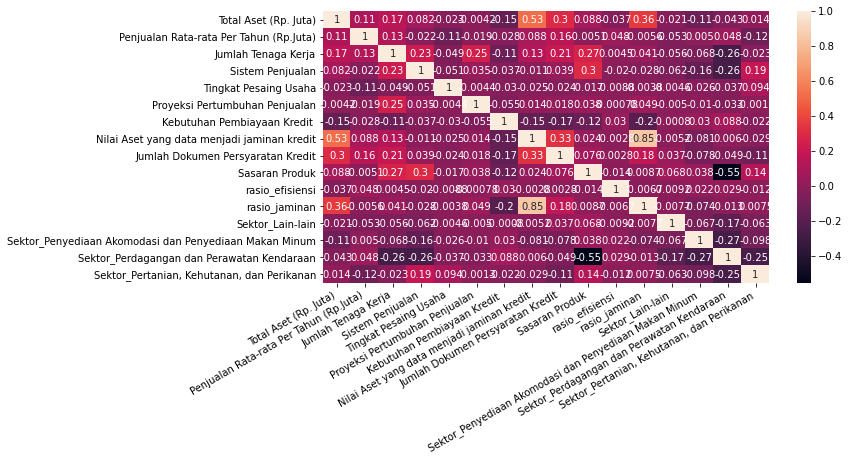

In [222]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(skenario1.corr(),annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
)

In [223]:
df_all.columns

Index(['Usaha /Produk Utama', 'Total Aset (Rp. Juta)',
       'Penjualan Rata-rata Per Tahun (Rp.Juta)', 'Jumlah Tenaga Kerja',
       'Sektor', 'Sistem Penjualan', 'Tingkat Pesaing Usaha',
       'Proyeksi Pertumbuhan Penjualan', 'Kebutuhan Pembiayaan Kredit ',
       'Nilai Aset yang data menjadi jaminan kredit',
       'Jumlah Dokumen Persyaratan Kredit', 'Sasaran Produk',
       'rasio_efisiensi', 'rasio_jaminan', 'jenis_umkm'],
      dtype='object')

In [225]:
skenario2 = seleksi[['Jumlah Tenaga Kerja', 'Total Aset (Rp. Juta)','Penjualan Rata-rata Per Tahun (Rp.Juta)',
                     'Kebutuhan Pembiayaan Kredit ', 'Nilai Aset yang data menjadi jaminan kredit', 'rasio_efisiensi',
                     'rasio_jaminan', 'Proyeksi Pertumbuhan Penjualan']]

In [226]:
korelasi = skenario2.corr()

In [227]:
for i in korelasi.columns:
    temp=abs(korelasi[i])
    col=temp[(temp>0.45) & (temp!=1)].index
    if col.empty:
        a=0
    else:
        print(i,col)

Total Aset (Rp. Juta) Index(['Nilai Aset yang data menjadi jaminan kredit'], dtype='object')
Nilai Aset yang data menjadi jaminan kredit Index(['Total Aset (Rp. Juta)', 'rasio_jaminan'], dtype='object')
rasio_jaminan Index(['Nilai Aset yang data menjadi jaminan kredit'], dtype='object')


In [228]:
skenario3 = seleksi[['Kebutuhan Pembiayaan Kredit ', 'Proyeksi Pertumbuhan Penjualan',
                     'rasio_jaminan', 'rasio_efisiensi']]

In [229]:
korelasi = skenario3.corr()

In [231]:
korelasi

,Kebutuhan Pembiayaan Kredit,Proyeksi Pertumbuhan Penjualan,rasio_jaminan,rasio_efisiensi
Kebutuhan Pembiayaan Kredit,1.000000,-0.054643,-0.195496,0.029973
Proyeksi Pertumbuhan Penjualan,-0.054643,1.000000,0.049451,-0.000782
rasio_jaminan,-0.195496,0.049451,1.000000,-0.006652
rasio_efisiensi,0.029973,-0.000782,-0.006652,1.000000


In [230]:
for i in korelasi.columns:
    temp=abs(korelasi[i])
    col=temp[(temp>0.47) & (temp!=1)].index
    if col.empty:
        a=0
    else:
        print(i,col)

Text(0.5, 1.0, 'Non-Collinearity Attributes ')

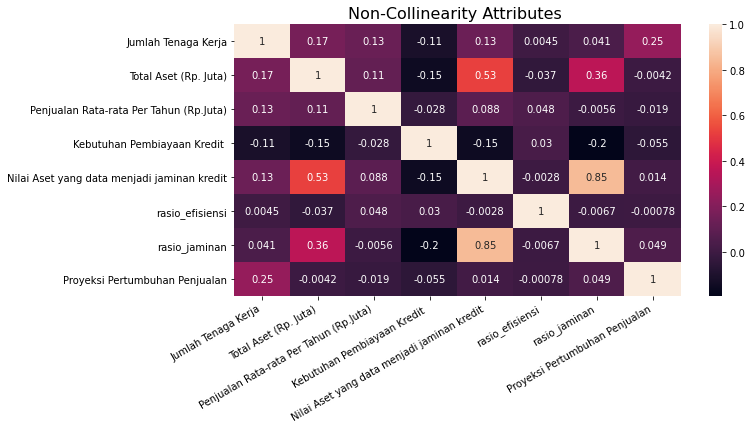

In [232]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(skenario2.corr(),annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
)
ax.set_title('Non-Collinearity Attributes ', fontsize=16)

In [233]:
data = skenario2

In [236]:
data

,Jumlah Tenaga Kerja,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,rasio_efisiensi,rasio_jaminan,Proyeksi Pertumbuhan Penjualan
0,2,5.00,48.0,5.0,4.0,9.600000,0.80,0.10
1,3,71.50,60.0,10.0,200.0,0.839161,20.00,0.10
3,12,13.00,402.0,8.0,10.0,30.923077,1.25,0.02
4,3,89.00,600.0,10.0,24.0,6.741573,2.40,0.10
6,1,153.00,160.0,10.0,150.0,1.045752,15.00,1.00
...,...,...,...,...,...,...,...,...
2399,1,16.30,216.0,10.0,9.0,13.251534,0.90,0.10
2400,2,22.50,704.0,10.0,10.0,31.288889,1.00,0.20
2401,1,16.50,115.0,5.0,14.0,6.969697,2.80,0.10
2402,5,90.95,94.5,0.0,30.0,1.039032,inf,0.80


In [245]:
data.index[np.isinf(data).any(1)]


Int64Index([], dtype='int64')

In [243]:
data=data.replace(float('inf'),0)

In [244]:
data

,Jumlah Tenaga Kerja,Total Aset (Rp. Juta),Penjualan Rata-rata Per Tahun (Rp.Juta),Kebutuhan Pembiayaan Kredit,Nilai Aset yang data menjadi jaminan kredit,rasio_efisiensi,rasio_jaminan,Proyeksi Pertumbuhan Penjualan
0,2,5.00,48.0,5.0,4.0,9.600000,0.80,0.10
1,3,71.50,60.0,10.0,200.0,0.839161,20.00,0.10
3,12,13.00,402.0,8.0,10.0,30.923077,1.25,0.02
4,3,89.00,600.0,10.0,24.0,6.741573,2.40,0.10
6,1,153.00,160.0,10.0,150.0,1.045752,15.00,1.00
...,...,...,...,...,...,...,...,...
2399,1,16.30,216.0,10.0,9.0,13.251534,0.90,0.10
2400,2,22.50,704.0,10.0,10.0,31.288889,1.00,0.20
2401,1,16.50,115.0,5.0,14.0,6.969697,2.80,0.10
2402,5,90.95,94.5,0.0,30.0,1.039032,0.00,0.80


In [246]:
from sklearn.preprocessing import MinMaxScaler
x_array = np.array(data)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(x_array)

In [247]:
def tuningKmeans(data,maxn,inits):
    best_score=-9999999
    waktu=datetime.datetime.now()
    namafile=str(waktu.strftime("%Y%m%d-%H%M%S"))+'_log_'+str(maxn)+str(inits)+'kmeans.txt'
    f = open(namafile,'w',encoding="utf-8")
    for init in inits:
        for i in range(2,maxn+1):
#             print(i,init)
            km = KMeans(n_clusters=i, random_state=100,init=init)
            pred = km.fit_predict(data)
            silhouette_avg = silhouette_score(data, pred)
            out='Silhouette score :'+str(silhouette_avg)+' dengan n='+str(i)+' tipe init= '+str(init)+'\n'
            print(out)
            f.write(out)
            if(silhouette_avg>best_score):
                best_score=silhouette_avg
                best_model=km
                best_pred=pred
                best_n=i
                best_init=init
    out='Best Model didapatkan dari n='+str(best_n)+', dengan init='+str(best_init)+', dengan score='+str(best_score)+'\n'
    print(out)
    f.write(out)
    f.close()
    return(best_model,best_pred)

In [251]:

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn import preprocessing
import datetime

maxn=5
inits=['k-means++','random']
model,pred=tuningKmeans(data_scaled,maxn,inits)

Silhouette score :0.49760734513547256 dengan n=2 tipe init= k-means++

Silhouette score :0.4589885979350643 dengan n=3 tipe init= k-means++

Silhouette score :0.4492129529955155 dengan n=4 tipe init= k-means++

Silhouette score :0.4590893326007179 dengan n=5 tipe init= k-means++

Silhouette score :0.49760734513547256 dengan n=2 tipe init= random

Silhouette score :0.4589885979350643 dengan n=3 tipe init= random

Silhouette score :0.4492129529955155 dengan n=4 tipe init= random

Silhouette score :0.45910635649136156 dengan n=5 tipe init= random

Best Model didapatkan dari n=2, dengan init=k-means++, dengan score=0.49760734513547256



In [252]:
def tuningHierar(data,maxn,linkages):
    best_score=-9999999
    waktu=datetime.datetime.now()
    namafile=str(waktu.strftime("%Y%m%d-%H%M%S"))+'_log_'+str(maxn)+str(linkages)+'AggloClust.txt'
    f = open(namafile,'w',encoding="utf-8")
    for linkage in linkages:
        for i in range(2,maxn+1):
    #             print(i,init)
            hie=AgglomerativeClustering(n_clusters=i,linkage=linkage)
            pred = hie.fit_predict(data)
            silhouette_avg = silhouette_score(data, pred)
            out='Silhouette score :'+str(silhouette_avg)+' dengan n='+str(i)+' tipe linkage= '+str(linkage)+'\n'
            print(out)
            f.write(out)
            if(silhouette_avg>best_score):
                best_score=silhouette_avg
                best_model=hie
                best_pred=pred
                best_n=i
                best_linkage=linkage
    out='Best Model didapatkan dari n='+str(best_n)+', dengan score='+str(best_score)+' tipe linkage= '+str(best_linkage)+'\n'
    print(out)
    f.write(out)
    f.close()
    return(best_model,best_pred)

In [253]:
maxn=5
linkages=['ward','complete']
model,pred=tuningHierar(data_scaled,maxn,linkages)

Silhouette score :0.4905429163229505 dengan n=2 tipe linkage= ward

Silhouette score :0.45451508273041097 dengan n=3 tipe linkage= ward

Silhouette score :0.4519796429690911 dengan n=4 tipe linkage= ward

Silhouette score :0.45656717918004164 dengan n=5 tipe linkage= ward

Silhouette score :0.6280599696415775 dengan n=2 tipe linkage= complete

Silhouette score :0.4843718575851432 dengan n=3 tipe linkage= complete

Silhouette score :0.4805676832893757 dengan n=4 tipe linkage= complete

Silhouette score :0.430761413120956 dengan n=5 tipe linkage= complete

Best Model didapatkan dari n=2, dengan score=0.6280599696415775 tipe linkage= complete



In [254]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

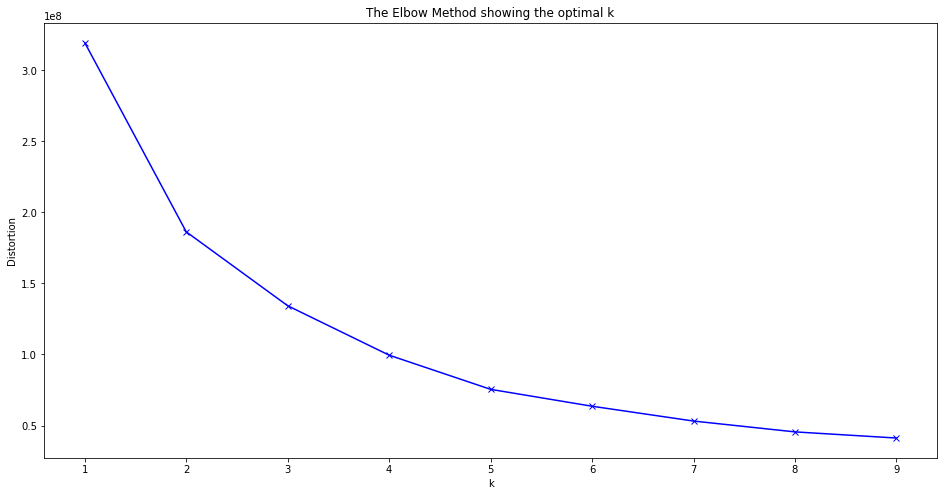

In [255]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [256]:
n=2

In [257]:
%%time
hie = AgglomerativeClustering(n_clusters=2,linkage='complete')
pred_h = hie.fit_predict(data_scaled)
silhouette_avg = silhouette_score(data_scaled, pred_h)
print(silhouette_avg)

0.6280599696415775
Wall time: 587 ms


In [258]:
%%time
km = KMeans(n_clusters=n, random_state=0,init='k-means++')
pred_p = km.fit_predict(data_scaled)
silhouette_avg = silhouette_score(data_scaled, pred_p)
print(silhouette_avg)

0.49760734513547256
Wall time: 253 ms


In [259]:
%%time
km = KMeans(n_clusters=n, random_state=0,init='random')
pred_r = km.fit_predict(data_scaled)
silhouette_avg = silhouette_score(data_scaled, pred_r)
print(silhouette_avg)

0.49760734513547256
Wall time: 325 ms


In [260]:
korr = data.copy()

In [261]:
korr['Class_p']= pred_p
korr['Class_r']= pred_r

In [262]:
korelasi = korr.corr(method='spearman')

In [263]:
corr_p=abs(korelasi['Class_p'])

In [264]:
corr_p

Jumlah Tenaga Kerja                            0.064424
Total Aset (Rp. Juta)                          0.024222
Penjualan Rata-rata Per Tahun (Rp.Juta)        0.134774
Kebutuhan Pembiayaan Kredit                    0.905710
Nilai Aset yang data menjadi jaminan kredit    0.019035
rasio_efisiensi                                0.105605
rasio_jaminan                                  0.225993
Proyeksi Pertumbuhan Penjualan                 0.074260
Class_p                                        1.000000
Class_r                                        1.000000
Name: Class_p, dtype: float64

In [266]:
corr_r=abs(korelasi['Class_r'])
corr_r

Jumlah Tenaga Kerja                            0.064424
Total Aset (Rp. Juta)                          0.024222
Penjualan Rata-rata Per Tahun (Rp.Juta)        0.134774
Kebutuhan Pembiayaan Kredit                    0.905710
Nilai Aset yang data menjadi jaminan kredit    0.019035
rasio_efisiensi                                0.105605
rasio_jaminan                                  0.225993
Proyeksi Pertumbuhan Penjualan                 0.074260
Class_p                                        1.000000
Class_r                                        1.000000
Name: Class_r, dtype: float64

In [274]:
x = data_scaled

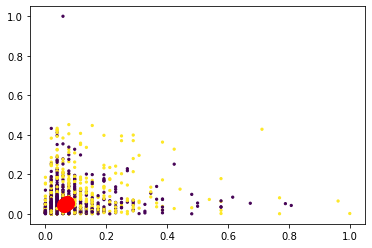

In [275]:
plt.scatter(x[:, 0], x[:, 1], c=pred_p, s=5, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1);